In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [8]:
stat = pd.read_csv('./pitchers_stat_fin.csv')

In [9]:
stat

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,mean_ERA,park_factor,Adj_ERA,연차,QS_G,SO_G,K_BB,cFIP,pFIP,WAR_won
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,4.756261,939,154.537353,4,0.000000,1.047619,1.941176,3.995,15.685141,1.812500
1,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,4.756261,939,117.529724,4,0.095238,2.238095,2.685714,3.995,5.076301,5.864407
2,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,4.756261,939,96.252791,5,0.166667,2.023810,1.287879,3.995,5.207121,0.885185
3,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,4.756261,939,92.466449,9,0.000000,0.476190,1.538462,3.995,5.312073,0.195238
4,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,4.756261,939,91.331891,3,0.000000,1.862069,2.454545,3.995,14.900660,2.862069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,4.140846,1025,81.154253,4,0.250000,3.142857,1.275362,3.849,18.515667,1.171429
440,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,4.140846,1025,81.154253,12,0.080000,1.300000,1.857143,3.849,5.268048,0.111429
441,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,4.140846,1025,75.522552,1,0.000000,1.040000,1.793103,3.849,18.884088,-0.500000
442,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,4.140846,1025,74.462587,1,0.058824,2.235294,1.225806,3.849,17.061766,0.266667


In [10]:
stat.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       '현재연봉', 'WAR_x', '예측연봉', 'tier', 'mean_ERA', 'park_factor', 'Adj_ERA',
       '연차', 'QS_G', 'SO_G', 'K_BB', 'cFIP', 'pFIP', 'WAR_won'],
      dtype='object')

In [11]:
stat['RA_9'] = (stat['R'] / stat['IP']) * 9

In [12]:
stat['RA_9']

0      4.309859
1      3.804878
2      5.318182
3      5.268293
4      5.094340
         ...   
439    5.750000
440    5.742857
441    6.157895
442    6.702128
443    6.412500
Name: RA_9, Length: 444, dtype: float64

In [13]:
stat['PFR'] = (stat['SO'] / stat['BB']) / stat['IP']

In [14]:
stat['PFR'].mean()

0.03283655590762657

In [15]:
def get_pfr_category(df, mean_2020, mean_2021, mean_2022, mean_2023):
    if df['연도'] == 2020:
        if df['PFR'] < mean_2020:
            return 0
        else:
            return 1
    elif df['연도'] == 2021:
        if df['PFR'] < mean_2021:
            return 0
        else:
            return 1
    elif df['연도'] == 2022:
        if df['PFR'] < mean_2022:
            return 0
        else:
            return 1
    else:
        if df['PFR'] < mean_2023:
            return 0
        else:
            return 1

In [16]:
stat_2020 = stat.query('연도 == 2020')
stat_2021 = stat.query('연도 == 2021')
stat_2022 = stat.query('연도 == 2022')
stat_2023 = stat.query('연도 == 2023')
m_2020 = stat_2020['PFR'].mean()
m_2021 = stat_2021['PFR'].mean()
m_2022 = stat_2022['PFR'].mean()
m_2023 = stat_2023['PFR'].mean()

In [17]:
stat['PFR_category'] = 0
stat['PFR_category'] = stat.apply(get_pfr_category, axis = 1, mean_2020 = m_2020, mean_2021 = m_2021, mean_2022 = m_2022, mean_2023 = m_2023)

In [18]:
stat

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,연차,QS_G,SO_G,K_BB,cFIP,pFIP,WAR_won,RA_9,PFR,PFR_category
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,4,0.000000,1.047619,1.941176,3.995,15.685141,1.812500,4.309859,0.027341,0
1,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,4,0.095238,2.238095,2.685714,3.995,5.076301,5.864407,3.804878,0.021835,0
2,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,5,0.166667,2.023810,1.287879,3.995,5.207121,0.885185,5.318182,0.009757,0
3,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,9,0.000000,0.476190,1.538462,3.995,5.312073,0.195238,5.268293,0.037523,1
4,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,3,0.000000,1.862069,2.454545,3.995,14.900660,2.862069,5.094340,0.046312,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,4,0.250000,3.142857,1.275362,3.849,18.515667,1.171429,5.750000,0.008857,0
440,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,12,0.080000,1.300000,1.857143,3.849,5.268048,0.111429,5.742857,0.017687,0
441,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,1,0.000000,1.040000,1.793103,3.849,18.884088,-0.500000,6.157895,0.031458,1
442,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,1,0.058824,2.235294,1.225806,3.849,17.061766,0.266667,6.702128,0.026081,0


In [19]:
stat.describe()

,순위,ERA,G,W,L,SV,HLD,WPCT,IP,H,...,연차,QS_G,SO_G,K_BB,cFIP,pFIP,WAR_won,RA_9,PFR,PFR_category
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,...,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,11.518018,4.164955,39.529279,4.671171,4.418919,2.551802,4.993243,0.497644,79.328829,27.680180,...,8.761261,0.153378,2.097899,2.175684,3.850867,12.420770,1.290540,4.653764,0.032837,0.432432
std,6.067873,1.325098,17.290808,3.792588,3.050397,7.160496,7.128770,0.240821,43.913520,44.048086,...,4.862139,0.231618,1.715356,0.973959,0.090706,5.985756,1.793499,1.410576,0.018022,0.495972
min,1.000000,1.480000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.300000,...,1.000000,0.000000,0.306452,0.580645,3.767000,2.666653,-1.483871,1.575000,0.007745,0.000000
25%,6.000000,3.260000,26.000000,2.000000,2.000000,0.000000,0.000000,0.333000,47.000000,0.300000,...,5.000000,0.000000,0.787338,1.497093,3.767000,5.421240,0.229432,3.607627,0.019215,0.000000
50%,11.000000,3.990000,36.500000,4.000000,4.000000,0.000000,1.000000,0.500000,61.500000,0.600000,...,8.000000,0.000000,1.168440,1.935133,3.849000,14.609014,0.782292,4.473529,0.028924,0.000000
75%,16.000000,5.020000,54.250000,6.000000,6.000000,1.000000,8.000000,0.640750,107.000000,51.000000,...,12.000000,0.285714,3.455435,2.684586,3.995000,17.034382,1.661649,5.640921,0.041751,1.000000
max,25.000000,10.760000,80.000000,19.000000,14.000000,44.000000,35.000000,1.000000,207.000000,183.000000,...,22.000000,0.846154,8.035714,6.782609,3.995000,25.576273,12.000000,11.414634,0.119149,1.000000


In [20]:
model = sm.OLS(stat['예측연봉'], stat[['ERA', 'W', '연차', 'WAR_x', 'Adj_ERA', 'WHIP', 'PFR','QS_G', 'WAR_won', 'K_BB','현재연봉']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   예측연봉   R-squared (uncentered):                   0.781
Model:                            OLS   Adj. R-squared (uncentered):              0.775
Method:                 Least Squares   F-statistic:                              140.3
Date:                Mon, 02 Sep 2024   Prob (F-statistic):                   3.90e-135
Time:                        12:46:12   Log-Likelihood:                         -4997.6
No. Observations:                 444   AIC:                                  1.002e+04
Df Residuals:                     433   BIC:                                  1.006e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ERA        -2690.8243   1599.136     -1.683      0.093   -5833.859     452.210
W           -331.7631    427.281     -0.776      0.438   -1171.565     508.039
연차           680.5419    208.308      3.267      0.001     271.122    1089.962
WAR_x       6515.2733   1582.462      4.117      0.000    3405.011    9625.536
Adj_ERA       34.9235     38.530      0.906      0.365     -40.806     110.653
WHIP        6923.2395   6205.555      1.116      0.265   -5273.516    1.91e+04
PFR        -2.879e+04   1.05e+05     -0.274      0.784   -2.35e+05    1.78e+05
QS_G        3.539e+04   8558.764      4.134      0.000    1.86e+04    5.22e+04
WAR_won    -4808.1016    642.965     -7.478      0.000   -6071.822   -3544.381
K_BB        3322.9261   1999.282      1.662      0.097    -606.579    7252.431
현재연봉           0.1232      0.023      5.350      0.000       0.078       0.168
==============================================================================
Omnibus:                      297.777   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4698.914
Skew:                           2.645   Prob(JB):                         0.00
Kurtosis:                      18.034   Cond. No.                     5.90e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
y, X = dmatrices('예측연봉 ~ ERA + W + 연차 + WAR_x + Adj_ERA + WHIP + SO_G + QS_G + PFR + K_BB + PFR_category + pFIP + WAR_won + 현재연봉', data = stat, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF_Factor,features
0,279.728201,Intercept
1,6.751774,ERA
2,3.328549,W
3,1.359507,연차
4,9.458022,WAR_x
5,5.475258,Adj_ERA
6,3.964111,WHIP
7,7.561533,SO_G
8,9.923096,QS_G
9,5.720246,PFR


<Axes: xlabel='ERA', ylabel='예측연봉'>

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabt

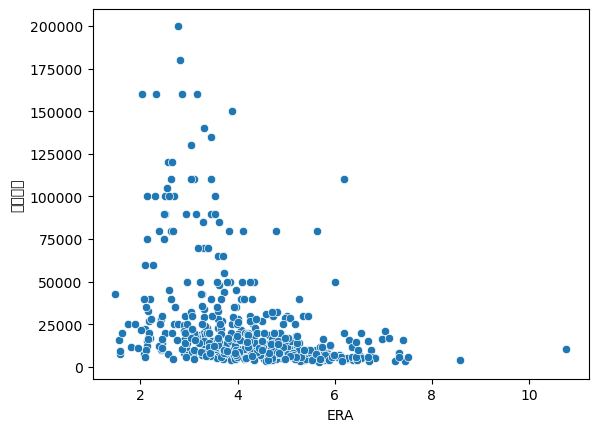

In [22]:
sns.scatterplot(x = stat['ERA'], y = stat['예측연봉'])

In [23]:
stat_corr = stat[['ERA','PFR_category', '연차', 'WAR_x', 'Adj_ERA', 'WHIP', 'PFR', 'QS_G', 'WAR_won', 'K_BB', 'RA_9','현재연봉', '예측연봉']].corr()

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from curren

<Axes: >

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: 

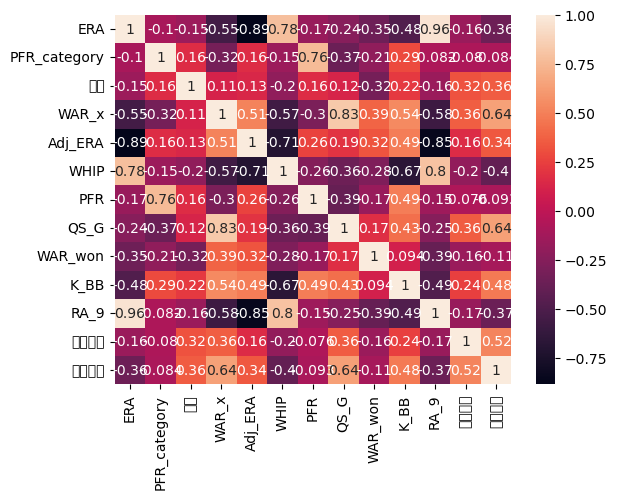

In [24]:
sns.heatmap(stat_corr, annot = True)

<Axes: xlabel='연차', ylabel='예측연봉'>

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarnin

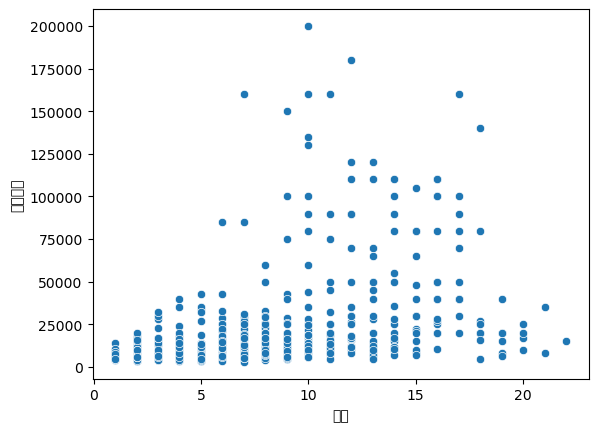

In [25]:
sns.scatterplot(x = stat['연차'], y = stat['예측연봉'])

<Axes: xlabel='QS', ylabel='예측연봉'>

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabt

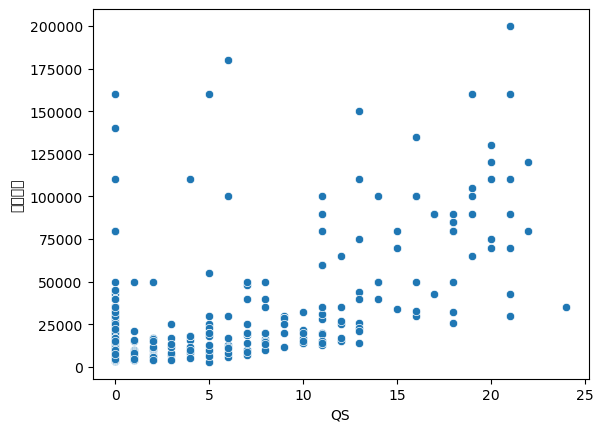

In [26]:
sns.scatterplot(x = stat['QS'], y = stat['예측연봉'])

<Axes: xlabel='QS_G', ylabel='예측연봉'>

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabt

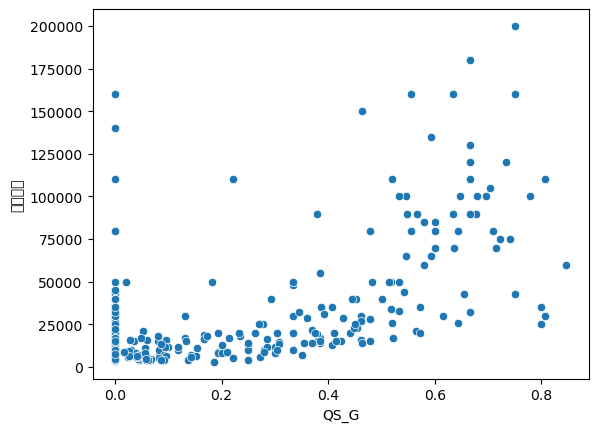

In [27]:
sns.scatterplot(x = stat['QS_G'], y = stat['예측연봉'])

In [28]:
stat['현재연봉'].describe()

count       444.000000
mean      21940.855856
std       45582.569361
min        2700.000000
25%        5000.000000
50%       10950.000000
75%       23025.000000
max      810000.000000
Name: 현재연봉, dtype: float64

<Axes: xlabel='PFR', ylabel='예측연봉'>

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabt

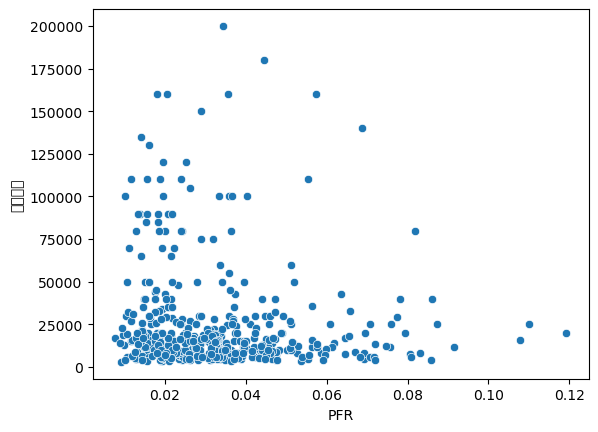

In [29]:
sns.scatterplot(x = stat['PFR'], y = stat['예측연봉'])

<Axes: xlabel='PFR_category', ylabel='예측연봉'>

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabt

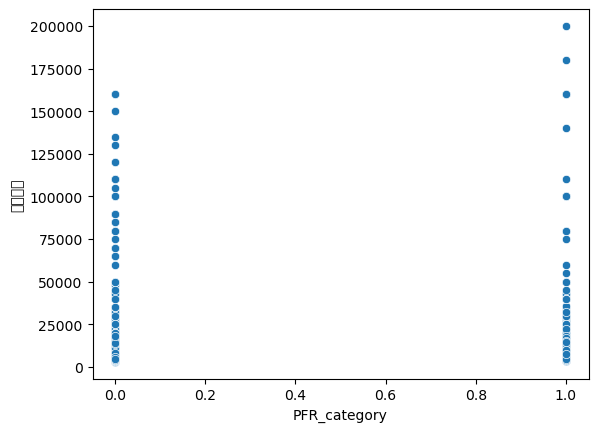

In [30]:
sns.scatterplot(x = stat['PFR_category'], y = stat['예측연봉'])

In [31]:
Finesse_pitcher = stat.query('PFR_category == 0')

In [32]:
Finesse_pitcher

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,연차,QS_G,SO_G,K_BB,cFIP,pFIP,WAR_won,RA_9,PFR,PFR_category
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,4,0.000000,1.047619,1.941176,3.995,15.685141,1.812500,4.309859,0.027341,0
1,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,4,0.095238,2.238095,2.685714,3.995,5.076301,5.864407,3.804878,0.021835,0
2,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,5,0.166667,2.023810,1.287879,3.995,5.207121,0.885185,5.318182,0.009757,0
6,16,유희관,두산,5.02,27,10,11,0,0,0.476,...,12,0.333333,2.074074,1.435897,3.995,22.259706,0.293617,6.022059,0.010558,0
9,2,윤대경,한화,1.59,55,5,0,0,7,1.000,...,8,0.000000,0.763636,1.680000,3.995,4.759706,4.678571,2.823529,0.032941,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,12,고효준,SSG,4.50,73,4,1,0,13,0.800,...,22,0.000000,0.904110,1.571429,3.849,4.573138,0.917647,4.810345,0.027094,0
439,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,4,0.250000,3.142857,1.275362,3.849,18.515667,1.171429,5.750000,0.008857,0
440,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,12,0.080000,1.300000,1.857143,3.849,5.268048,0.111429,5.742857,0.017687,0
442,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,1,0.058824,2.235294,1.225806,3.849,17.061766,0.266667,6.702128,0.026081,0


In [33]:
Power_pitcher = stat.query('PFR_category == 1')
Power_pitcher

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,연차,QS_G,SO_G,K_BB,cFIP,pFIP,WAR_won,RA_9,PFR,PFR_category
3,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,9,0.000000,0.476190,1.538462,3.995,5.312073,0.195238,5.268293,0.037523,1
4,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,3,0.000000,1.862069,2.454545,3.995,14.900660,2.862069,5.094340,0.046312,1
5,15,홍건희,두산,4.98,60,3,4,1,8,0.429,...,10,0.000000,1.000000,2.727273,3.995,17.568529,0.698113,5.161765,0.040107,1
7,18,이현승,두산,5.31,62,2,1,2,10,0.667,...,19,0.000000,0.677419,2.000000,3.995,18.495000,0.140000,5.785714,0.047619,1
8,20,이승진,두산,5.61,33,2,4,0,5,0.333,...,7,0.030303,1.636364,2.454545,3.995,17.308725,0.744681,5.823529,0.048128,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,19,최채흥,삼성,6.68,15,1,7,0,0,0.125,...,6,0.133333,2.200000,2.062500,3.849,22.277571,0.140000,7.428571,0.032738,1
431,5,이건욱,SSG,2.09,27,1,0,0,0,1.000,...,10,0.000000,1.148148,1.240000,3.849,14.954263,1.935484,3.078947,0.032632,1
436,11,최민준,SSG,4.20,53,5,3,1,7,0.625,...,6,0.000000,0.698113,1.947368,3.849,5.132333,0.215385,4.350000,0.032456,1
438,13,백승건,SSG,4.97,25,2,2,0,3,0.500,...,5,0.000000,1.160000,1.705882,3.849,6.059526,1.000000,5.684211,0.044892,1


In [34]:
F_current_salary = Finesse_pitcher['현재연봉'].mean()
F_future_salary = Finesse_pitcher['예측연봉'].mean()
P_current_salary = Power_pitcher['현재연봉'].mean()
P_future_salary = Power_pitcher['예측연봉'].mean()

<Axes: >

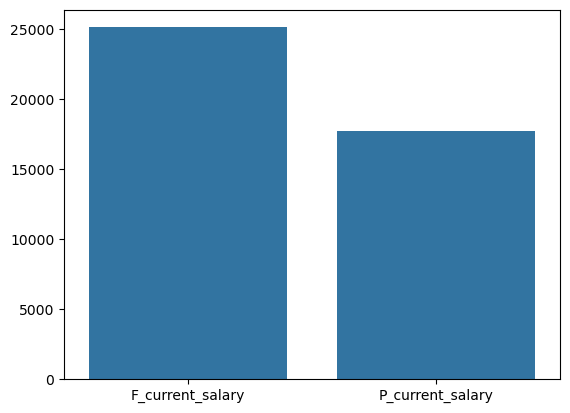

In [35]:
sns.barplot(x = ['F_current_salary', 'P_current_salary'], y = [F_current_salary, P_current_salary])

<Axes: >

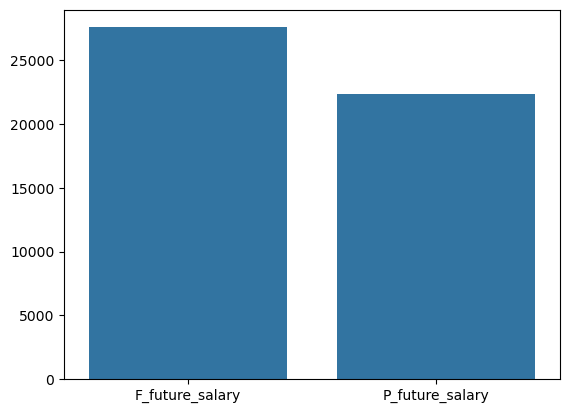

In [36]:
sns.barplot(x = ['F_future_salary', 'P_future_salary'], y = [F_future_salary, P_future_salary])

In [37]:
F_age = Finesse_pitcher['연차'].mean()
P_age = Power_pitcher['연차'].mean()

<Axes: >

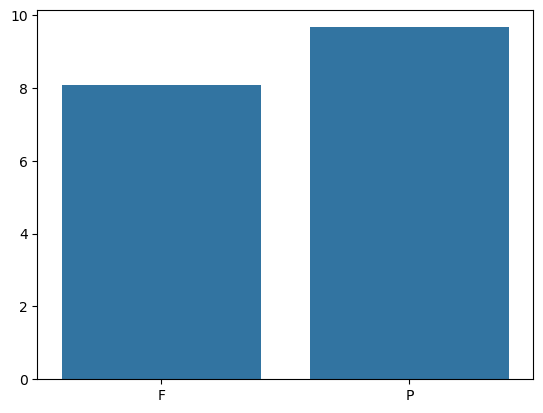

In [38]:
sns.barplot(x = ['F', 'P'], y = [F_age, P_age])

In [39]:
F_age_std = Finesse_pitcher['연차'].std()
P_age_std = Power_pitcher['연차'].std()

<Axes: >

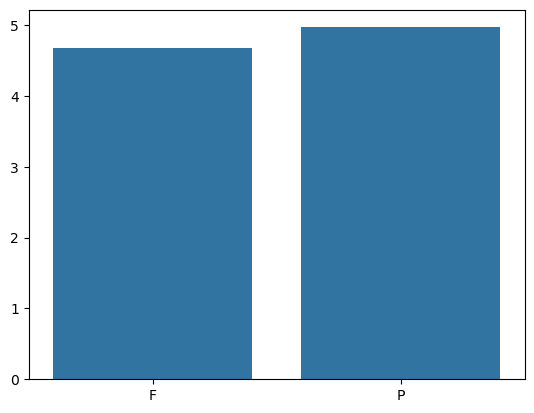

In [40]:
sns.barplot(x = ['F', 'P'], y = [F_age_std, P_age_std])

In [41]:
F_current_salary_std = Finesse_pitcher['현재연봉'].std()
F_future_salary_std = Finesse_pitcher['예측연봉'].std()
P_current_salary_std = Power_pitcher['현재연봉'].std()
P_future_salary_std = Power_pitcher['예측연봉'].std()

<Axes: >

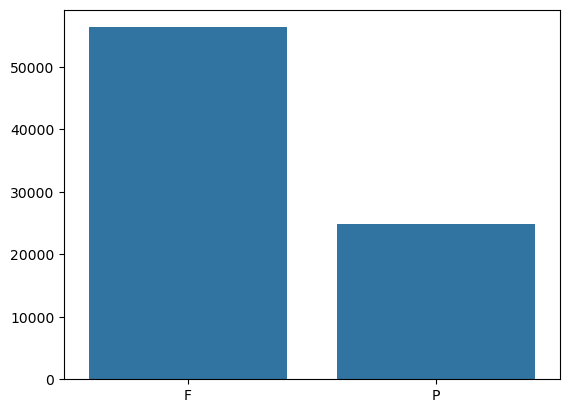

In [42]:
sns.barplot(x = ['F', 'P'], y = [F_current_salary_std, P_current_salary_std])

<Axes: >

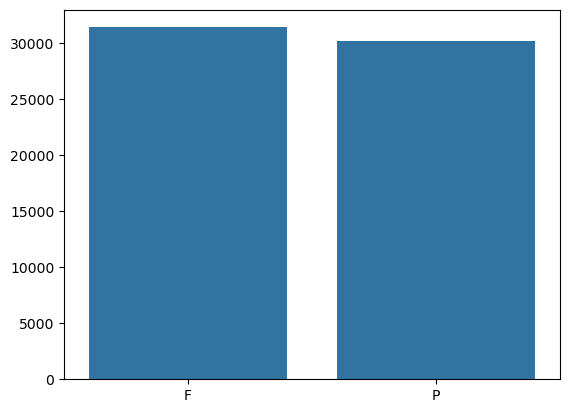

In [43]:
sns.barplot(x = ['F', 'P'], y = [F_future_salary_std, P_future_salary_std])

<Axes: >

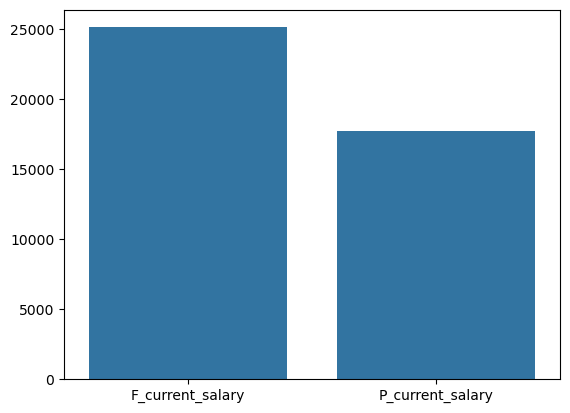

In [44]:
sns.barplot(x = ['F_current_salary', 'P_current_salary'], y = [F_current_salary, P_current_salary])

<Axes: >

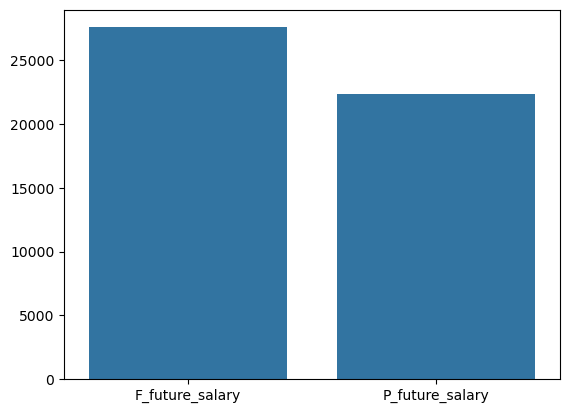

In [45]:
sns.barplot(x = ['F_future_salary', 'P_future_salary'], y = [F_future_salary, P_future_salary])

In [46]:
stat_c = stat.copy()

In [47]:
stat_c.describe()

,순위,ERA,G,W,L,SV,HLD,WPCT,IP,H,...,연차,QS_G,SO_G,K_BB,cFIP,pFIP,WAR_won,RA_9,PFR,PFR_category
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,...,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,11.518018,4.164955,39.529279,4.671171,4.418919,2.551802,4.993243,0.497644,79.328829,27.680180,...,8.761261,0.153378,2.097899,2.175684,3.850867,12.420770,1.290540,4.653764,0.032837,0.432432
std,6.067873,1.325098,17.290808,3.792588,3.050397,7.160496,7.128770,0.240821,43.913520,44.048086,...,4.862139,0.231618,1.715356,0.973959,0.090706,5.985756,1.793499,1.410576,0.018022,0.495972
min,1.000000,1.480000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.300000,...,1.000000,0.000000,0.306452,0.580645,3.767000,2.666653,-1.483871,1.575000,0.007745,0.000000
25%,6.000000,3.260000,26.000000,2.000000,2.000000,0.000000,0.000000,0.333000,47.000000,0.300000,...,5.000000,0.000000,0.787338,1.497093,3.767000,5.421240,0.229432,3.607627,0.019215,0.000000
50%,11.000000,3.990000,36.500000,4.000000,4.000000,0.000000,1.000000,0.500000,61.500000,0.600000,...,8.000000,0.000000,1.168440,1.935133,3.849000,14.609014,0.782292,4.473529,0.028924,0.000000
75%,16.000000,5.020000,54.250000,6.000000,6.000000,1.000000,8.000000,0.640750,107.000000,51.000000,...,12.000000,0.285714,3.455435,2.684586,3.995000,17.034382,1.661649,5.640921,0.041751,1.000000
max,25.000000,10.760000,80.000000,19.000000,14.000000,44.000000,35.000000,1.000000,207.000000,183.000000,...,22.000000,0.846154,8.035714,6.782609,3.995000,25.576273,12.000000,11.414634,0.119149,1.000000


In [48]:
stat_c = stat_c.drop(['PFR', 'PFR_category'], axis = 1)

In [49]:
stat_c

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,park_factor,Adj_ERA,연차,QS_G,SO_G,K_BB,cFIP,pFIP,WAR_won,RA_9
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,939,154.537353,4,0.000000,1.047619,1.941176,3.995,15.685141,1.812500,4.309859
1,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,939,117.529724,4,0.095238,2.238095,2.685714,3.995,5.076301,5.864407,3.804878
2,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,939,96.252791,5,0.166667,2.023810,1.287879,3.995,5.207121,0.885185,5.318182
3,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,939,92.466449,9,0.000000,0.476190,1.538462,3.995,5.312073,0.195238,5.268293
4,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,939,91.331891,3,0.000000,1.862069,2.454545,3.995,14.900660,2.862069,5.094340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,1025,81.154253,4,0.250000,3.142857,1.275362,3.849,18.515667,1.171429,5.750000
440,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,1025,81.154253,12,0.080000,1.300000,1.857143,3.849,5.268048,0.111429,5.742857
441,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,1025,75.522552,1,0.000000,1.040000,1.793103,3.849,18.884088,-0.500000,6.157895
442,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,1025,74.462587,1,0.058824,2.235294,1.225806,3.849,17.061766,0.266667,6.702128


In [50]:
stat_c['예측연봉'].describe()

count       444.000000
mean      25306.756757
std       30978.441259
min        3000.000000
25%        8150.000000
50%       14250.000000
75%       26125.000000
max      200000.000000
Name: 예측연봉, dtype: float64

In [69]:
stat_c['salary_cluster'] = np.where(stat['예측연봉'] >= 26125, 3,
                                    np.where(stat['예측연봉'] >= 14250, 2,
                                    np.where(stat['예측연봉'] >= 8150, 1, 0)))

In [70]:
stat_c

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,연차,QS_G,SO_G,K_BB,cFIP,pFIP,WAR_won,RA_9,salary_cluster,current_cluster
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,4,0.000000,1.047619,1.941176,3.995,15.685141,1.812500,4.309859,2,2
1,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,4,0.095238,2.238095,2.685714,3.995,5.076301,5.864407,3.804878,2,2
2,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,5,0.166667,2.023810,1.287879,3.995,5.207121,0.885185,5.318182,2,4
3,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,9,0.000000,0.476190,1.538462,3.995,5.312073,0.195238,5.268293,2,3
4,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,3,0.000000,1.862069,2.454545,3.995,14.900660,2.862069,5.094340,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,4,0.250000,3.142857,1.275362,3.849,18.515667,1.171429,5.750000,1,3
440,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,12,0.080000,1.300000,1.857143,3.849,5.268048,0.111429,5.742857,2,4
441,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,1,0.000000,1.040000,1.793103,3.849,18.884088,-0.500000,6.157895,0,1
442,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,1,0.058824,2.235294,1.225806,3.849,17.061766,0.266667,6.702128,0,1


In [71]:
stat_c['salary_cluster']

0      2
1      2
2      2
3      2
4      0
      ..
439    1
440    2
441    0
442    0
443    3
Name: salary_cluster, Length: 444, dtype: int32

In [72]:
salary_count_v = stat_c['salary_cluster'].value_counts()

In [73]:
salary_count_v

salary_cluster
2    111
0    111
1    111
3    111
Name: count, dtype: int64

<Axes: xlabel='salary_cluster'>

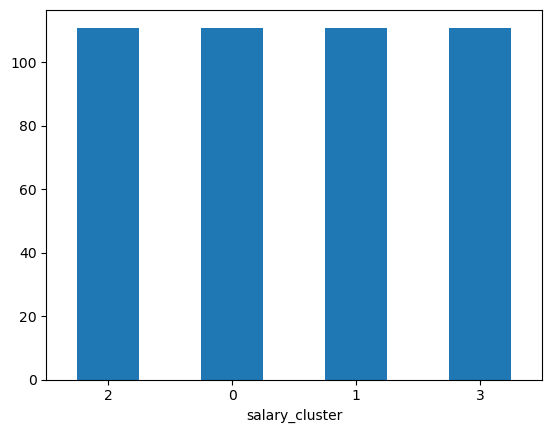

In [74]:
salary_count_v.plot.bar(rot = 0)

In [75]:
stat_c['현재연봉'].describe()

count       444.000000
mean      21940.855856
std       45582.569361
min        2700.000000
25%        5000.000000
50%       10950.000000
75%       23025.000000
max      810000.000000
Name: 현재연봉, dtype: float64

In [76]:
stat_c['current_cluster'] = np.where(stat['현재연봉'] >= 23025, 3,
                                    np.where(stat['현재연봉'] >= 10950, 2,
                                    np.where(stat['현재연봉'] >= 5000, 1, 0)))

In [77]:
stat_c.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       '현재연봉', 'WAR_x', '예측연봉', 'tier', 'mean_ERA', 'park_factor', 'Adj_ERA',
       '연차', 'QS_G', 'SO_G', 'K_BB', 'cFIP', 'pFIP', 'WAR_won', 'RA_9',
       'salary_cluster', 'current_cluster'],
      dtype='object')

In [78]:
stat_c_corr = stat_c[['ERA', 'QS_G', 'SO_G', 'K_BB', 'SO', 'QS', 'RA_9', 'WAR_x','W', 'IP', 'current_cluster','salary_cluster']].corr()

<Axes: >

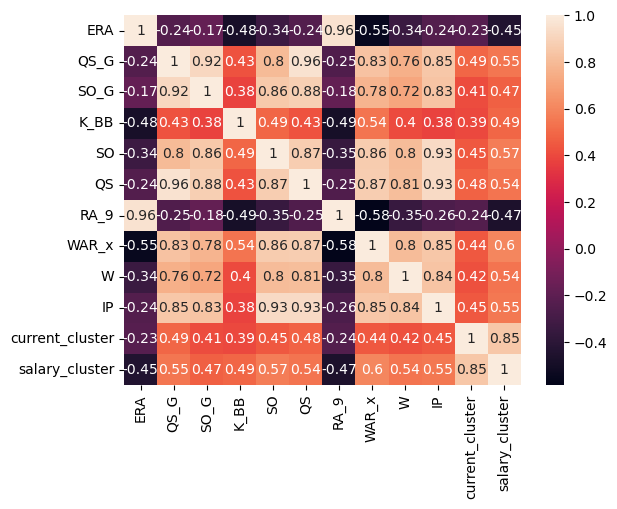

In [79]:
sns.heatmap(stat_c_corr, annot = True)

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


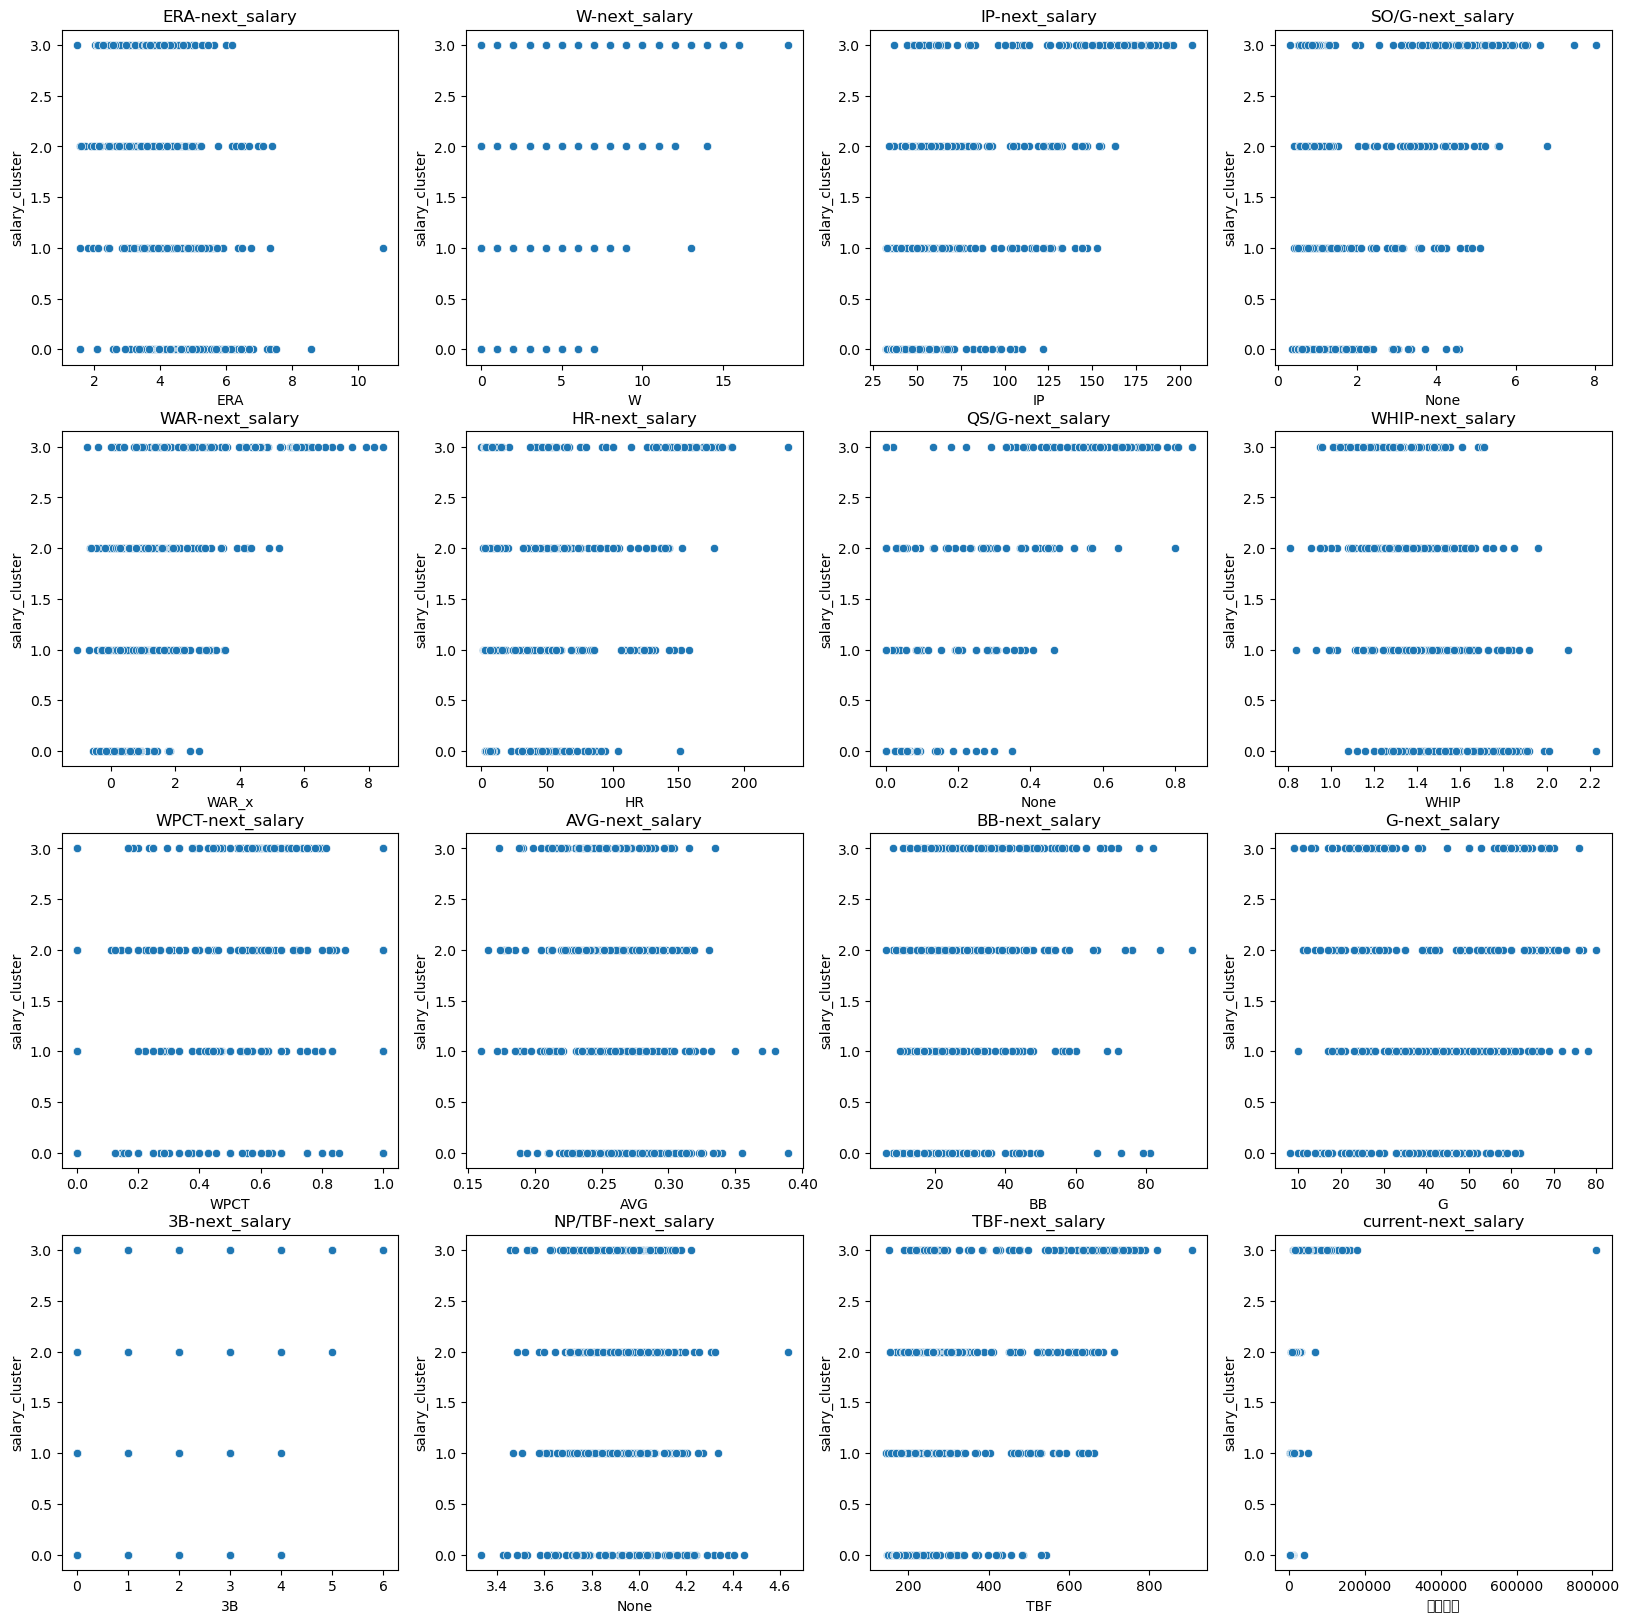

In [80]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
sns.scatterplot(x = stat_c['ERA'], y = stat_c['salary_cluster'], ax = axes[0,0])
axes[0,0].set_title('ERA-next_salary')
sns.scatterplot(x = stat_c['W'], y = stat_c['salary_cluster'], ax = axes[0,1])
axes[0,1].set_title('W-next_salary')
sns.scatterplot(x = stat_c['IP'], y = stat_c['salary_cluster'], ax = axes[0,2])
axes[0,2].set_title('IP-next_salary')
sns.scatterplot(x = stat_c['SO']/stat_c['G'], y = stat_c['salary_cluster'], ax = axes[0,3])
axes[0,3].set_title('SO/G-next_salary')
sns.scatterplot(x = stat_c['WAR_x'], y = stat_c['salary_cluster'], ax = axes[1,0])
axes[1,0].set_title('WAR-next_salary')
sns.scatterplot(x = stat_c['HR'], y = stat_c['salary_cluster'], ax = axes[1,1])
axes[1, 1].set_title('HR-next_salary')
sns.scatterplot(x = stat_c['QS']/stat_c['G'], y = stat_c['salary_cluster'], ax = axes[1,2])
axes[1,2].set_title('QS/G-next_salary')
sns.scatterplot(x = stat_c['WHIP'], y = stat_c['salary_cluster'], ax = axes[1, 3])
axes[1,3].set_title('WHIP-next_salary')
sns.scatterplot(x = stat_c['WPCT'], y = stat_c['salary_cluster'], ax = axes[2,0])
axes[2,0].set_title('WPCT-next_salary')
sns.scatterplot(x = stat_c['AVG'], y = stat_c['salary_cluster'], ax = axes[2,1])
axes[2,1].set_title('AVG-next_salary')
sns.scatterplot(x = stat_c['BB'], y = stat_c['salary_cluster'], ax = axes[2, 2])
axes[2,2].set_title('BB-next_salary')
sns.scatterplot(x = stat_c['G'], y = stat_c['salary_cluster'], ax = axes[2,3])
axes[2,3].set_title('G-next_salary')
sns.scatterplot(x = stat_c['3B'], y = stat_c['salary_cluster'], ax = axes[3,0])
axes[3,0].set_title('3B-next_salary')
sns.scatterplot(x = stat_c['NP']/stat_c['TBF'], y = stat_c['salary_cluster'], ax = axes[3,1])
axes[3,1].set_title('NP/TBF-next_salary')
sns.scatterplot(x = stat_c['TBF'], y = stat_c['salary_cluster'], ax = axes[3,2])
axes[3,2].set_title('TBF-next_salary')
sns.scatterplot(x = stat_c['현재연봉'], y = stat_c['salary_cluster'], ax = axes[3,3])
axes[3,3].set_title('current-next_salary')
plt.show()

In [100]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [97]:
stat_c.to_csv('pitchers_stat_cluster.csv', index = False)

In [96]:
stat_c['exp_QS'] = stat_c['QS_G'] * stat_c['QS']

In [83]:
stat_c.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       '현재연봉', 'WAR_x', '예측연봉', 'tier', 'mean_ERA', 'park_factor', 'Adj_ERA',
       '연차', 'QS_G', 'SO_G', 'K_BB', 'cFIP', 'pFIP', 'WAR_won', 'RA_9',
       'salary_cluster', 'current_cluster'],
      dtype='object')

In [108]:
stat_c_cor = stat_c[['ERA', 'QS_G', 'SO', 'WAR_x', 'W', 'IP', 'K_BB', 'exp_QS','SO_G', 'QS', 'NP', 'RA_9', '연차', 'TBF', '현재연봉', 'WHIP','salary_cluster']].corr()

In [110]:
mask = np.zeros_like(stat_c_cor)
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [111]:
mask[np.triu_indices_from(mask)] = 1
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1

In [115]:
nmask = mask[1:, :-1]
cor_new = stat_c_cor.iloc[1:, :-1]

<Axes: >

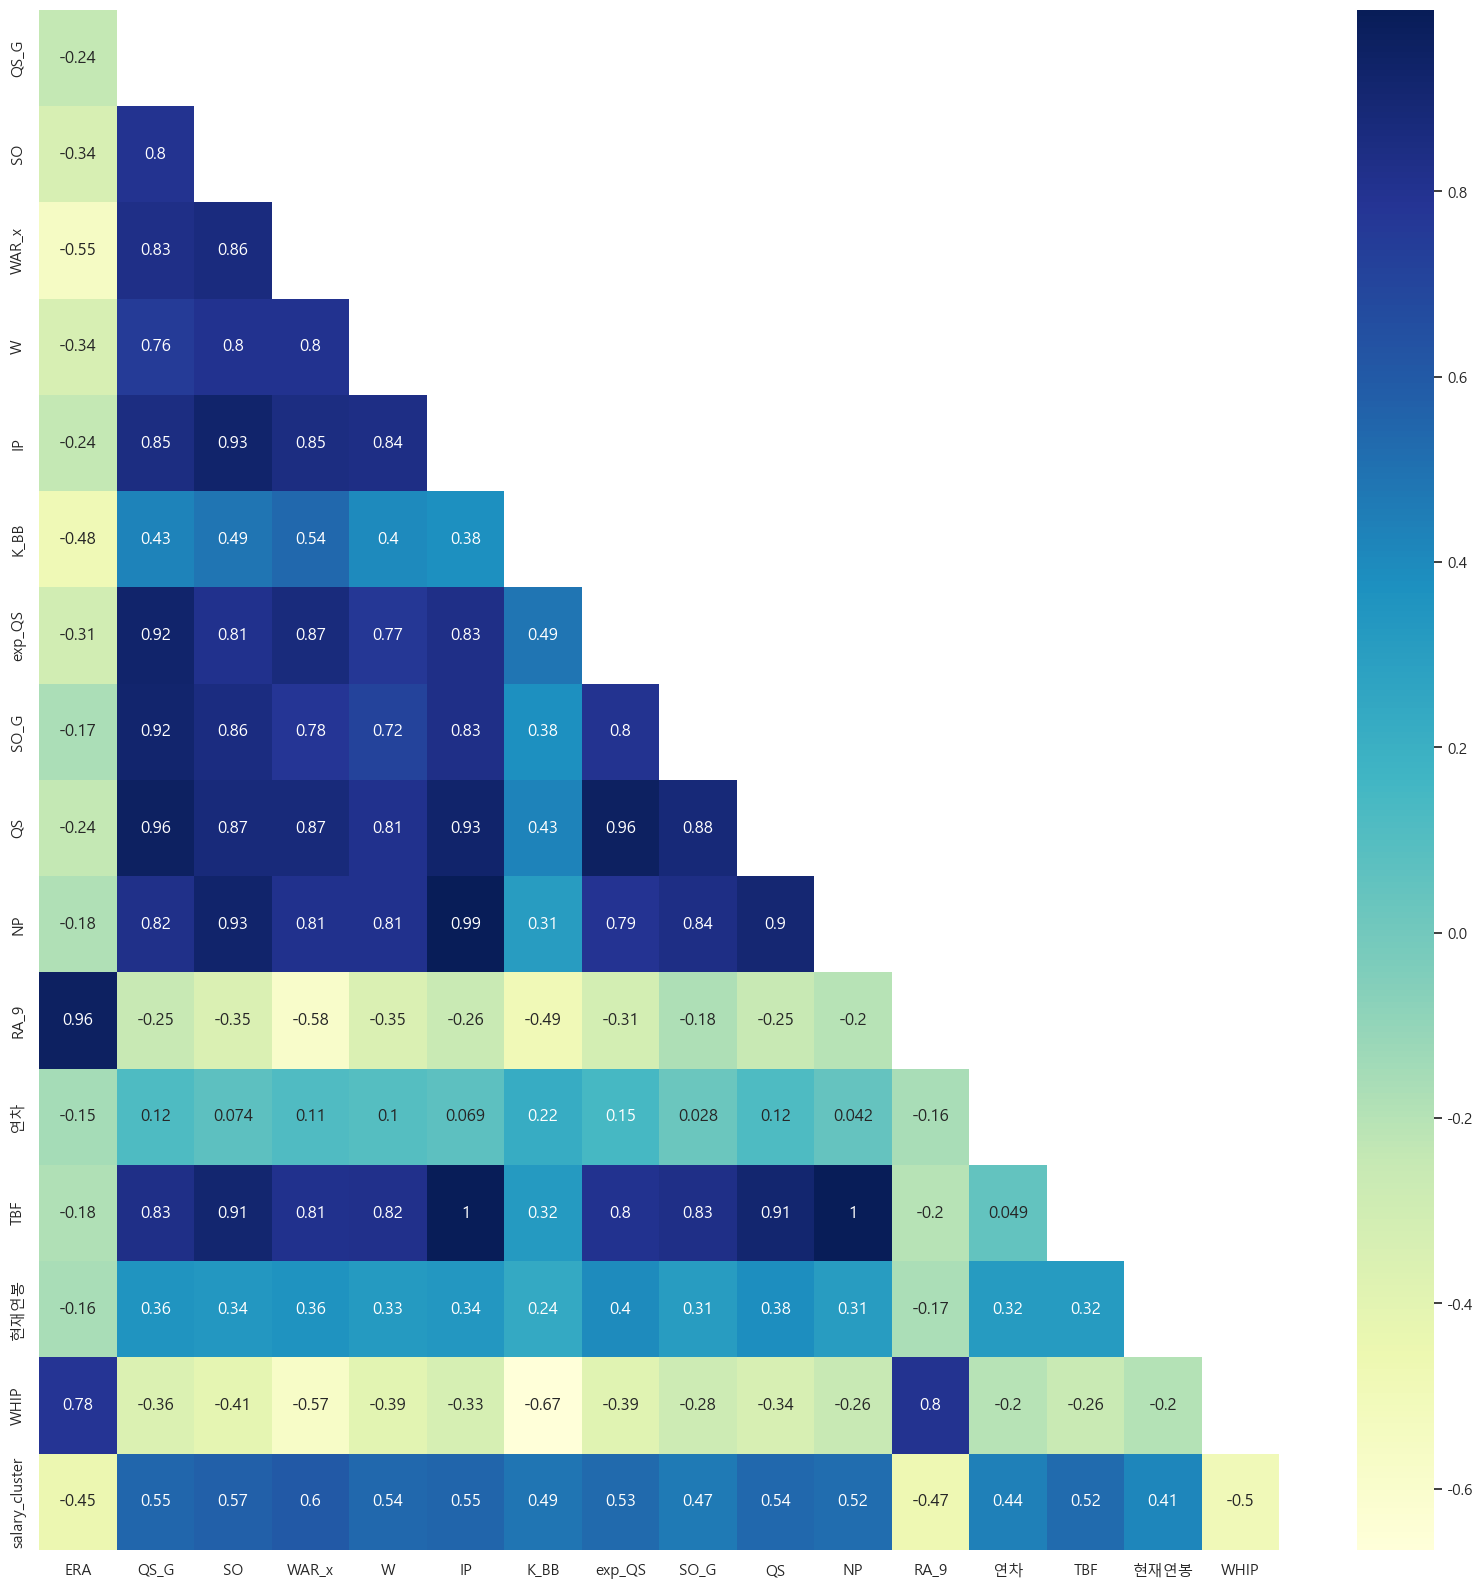

In [116]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(cor_new, annot = True, cmap = 'YlGnBu', mask = nmask)

In [95]:
y, X = dmatrices('salary_cluster ~ ERA + W + 연차 + WAR_x + Adj_ERA + WHIP + SO_G + QS_G + K_BB + current_cluster', data = stat_c, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF_Factor,features
0,269.293833,Intercept
1,6.620026,ERA
2,3.146173,W
3,1.501930,연차
4,7.477796,WAR_x
5,5.149478,Adj_ERA
6,3.682452,WHIP
7,7.127277,SO_G
8,9.184404,QS_G
9,2.120617,K_BB
